In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
annotations = pd.read_csv("data/task_2_annotations_82d1d6d1093eaab6_e330cbf_generic.csv")
features = pd.read_csv("data/task_2_features_1d8b658c21ddc127_e330cbf_generic.csv")

In [27]:
annotations = annotations.astype({'pianist_id': str, 'segment_id': str, 'annotator_id': str})
annotations.dtypes

pianist_id                 object
segment_id                 object
annotator_id               object
arousal                     int64
valence                     int64
gems_wonder                 int64
gems_transcendence          int64
gems_tenderness             int64
gems_nostalgia              int64
gems_peacefulness         float64
gems_power                  int64
gems_joyful_activation      int64
gems_tension                int64
gems_sadness                int64
gemmes_flow                 int64
gemmes_movement             int64
gemmes_force                int64
gemmes_interior           float64
gemmes_wandering            int64
dtype: object

In [28]:
annotations.head()

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
1,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
2,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
3,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
4,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1


In [29]:
features = features.astype({'pianist_id': str, 'segment_id': str, 'snippet_id': str})
features.dtypes

pianist_id                      object
segment_id                      object
snippet_id                      object
essentia_dissonance_mean       float64
essentia_dissonance_stdev      float64
                                ...   
mirtoolbox_roughness_mean      float64
mirtoolbox_roughness_std       float64
mirtoolbox_roughness_pct_10    float64
mirtoolbox_roughness_pct_50    float64
mirtoolbox_roughness_pct_90    float64
Length: 172, dtype: object

In [30]:
features.head()

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.8,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.6,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.6,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.4,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.6,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731


In [31]:
features.describe()

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
count,2282.000000,2282.000000,2282.000000,2.282000e+03,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,...,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,0.188855,0.061153,2.911903,5.563347e+07,2.563729,0.624854,0.101175,1031.851529,240.739715,29.215251,...,0.172455,0.000132,0.042511,0.285834,0.196721,0.011317,0.004220,0.006245,0.010869,0.016979
std,0.045299,0.008382,1.734871,6.335631e+07,1.823307,0.053822,0.019604,315.326015,187.896004,0.889037,...,0.042395,0.000996,0.030085,0.136980,0.102406,0.003472,0.000882,0.003028,0.003572,0.004126
min,0.059951,0.025707,0.000000,1.435069e+04,0.200000,0.318932,0.057012,550.158936,72.009972,24.000000,...,0.099175,-0.000052,0.000000,0.030207,-0.201072,0.001226,0.001291,0.000000,0.000643,0.003306
25%,0.157475,0.055926,1.826072,1.598447e+07,1.600000,0.594817,0.087541,855.883926,156.972076,28.667245,...,0.143093,0.000000,0.022643,0.185282,0.133256,0.008831,0.003650,0.003968,0.008375,0.014195
50%,0.189944,0.060098,2.454455,3.282579e+07,2.400000,0.631172,0.098439,983.526489,190.916634,29.222221,...,0.167317,0.000000,0.036141,0.269425,0.174797,0.011168,0.004138,0.005970,0.010673,0.016957
75%,0.220248,0.064796,3.448091,6.815258e+07,3.200000,0.662489,0.112793,1130.898682,238.520138,29.761574,...,0.194196,0.000000,0.053860,0.358590,0.236701,0.013746,0.004686,0.008370,0.013430,0.019713
max,0.360551,0.119466,14.830730,4.956515e+08,32.049419,0.767457,0.260845,6678.526855,2260.472900,32.129631,...,0.433013,0.034168,0.385651,0.902180,1.000000,0.023783,0.008862,0.017414,0.023911,0.030822


In [32]:
annotations.describe()

,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
count,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2638.000000,2637.000000,2638.000000
mean,2.929492,0.020849,2.901440,2.673616,2.366187,2.723275,2.395525,2.313495,2.276725,2.596664,2.148218,2.968537,2.561031,2.434420,2.690178,2.496209
std,1.184031,1.099842,1.267184,1.235916,1.297041,1.371744,1.367916,1.232190,1.239287,1.412181,1.177312,1.329116,1.261079,1.264754,1.258940,1.279556
min,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,-1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
50%,3.000000,0.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,1.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 1. How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

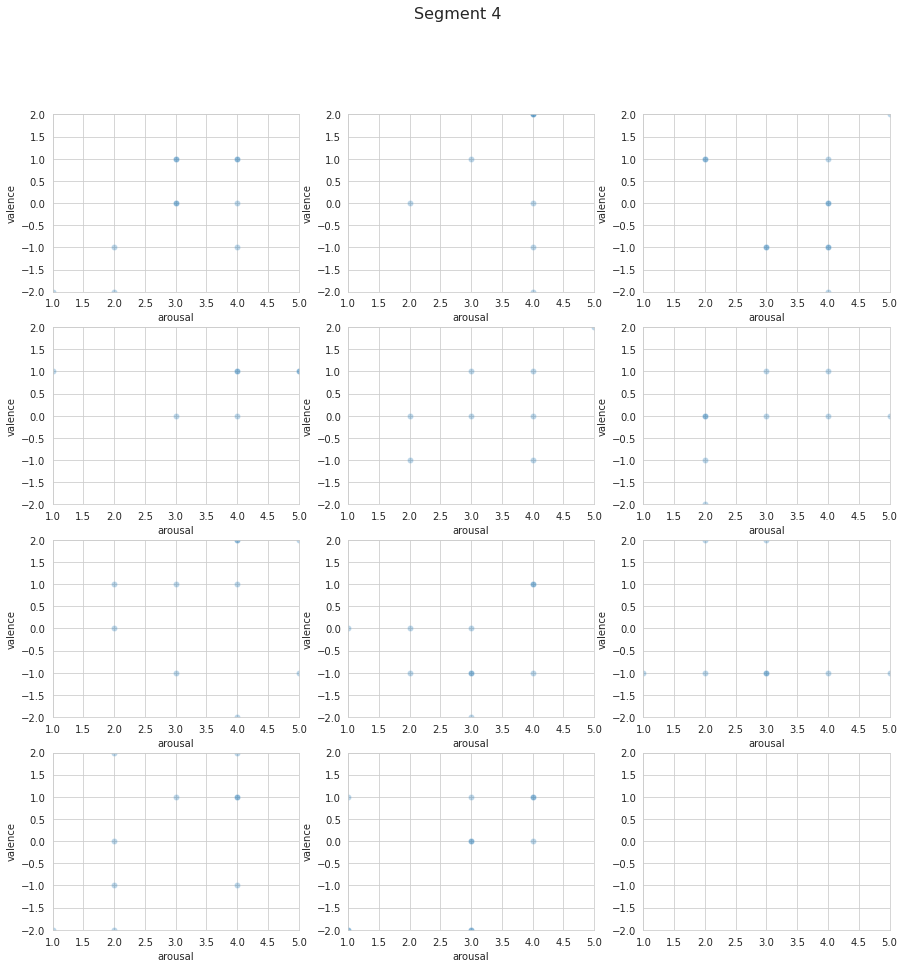

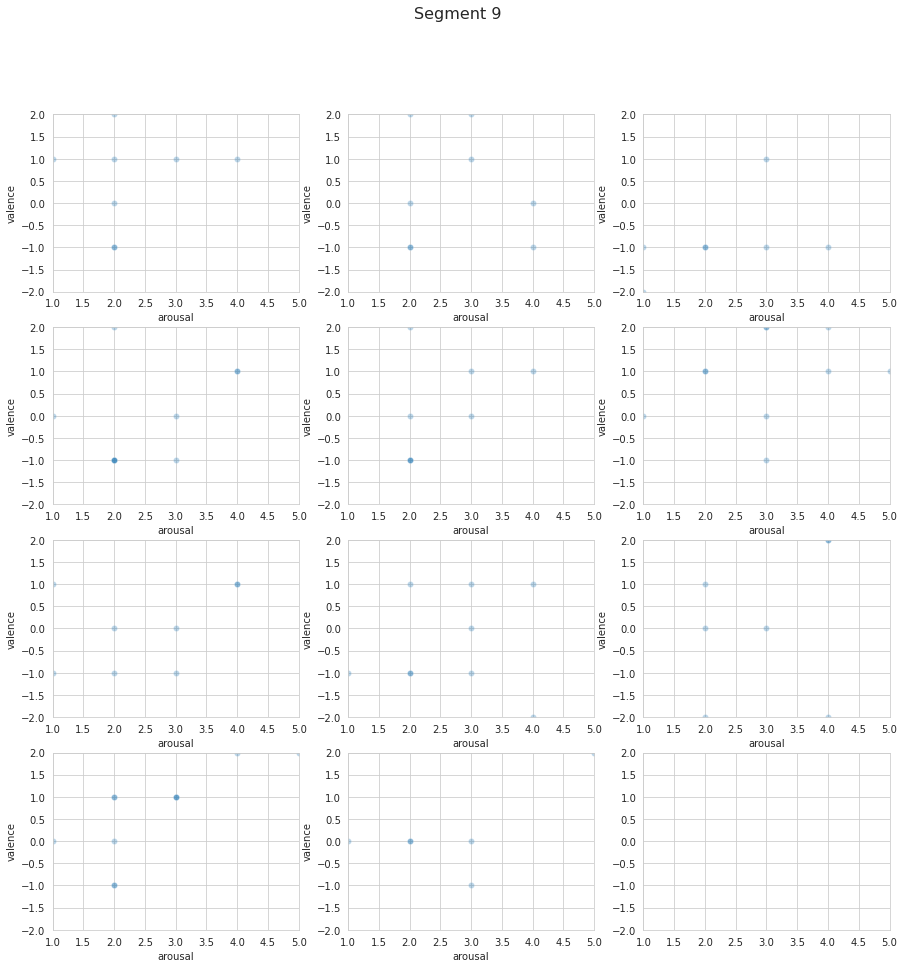

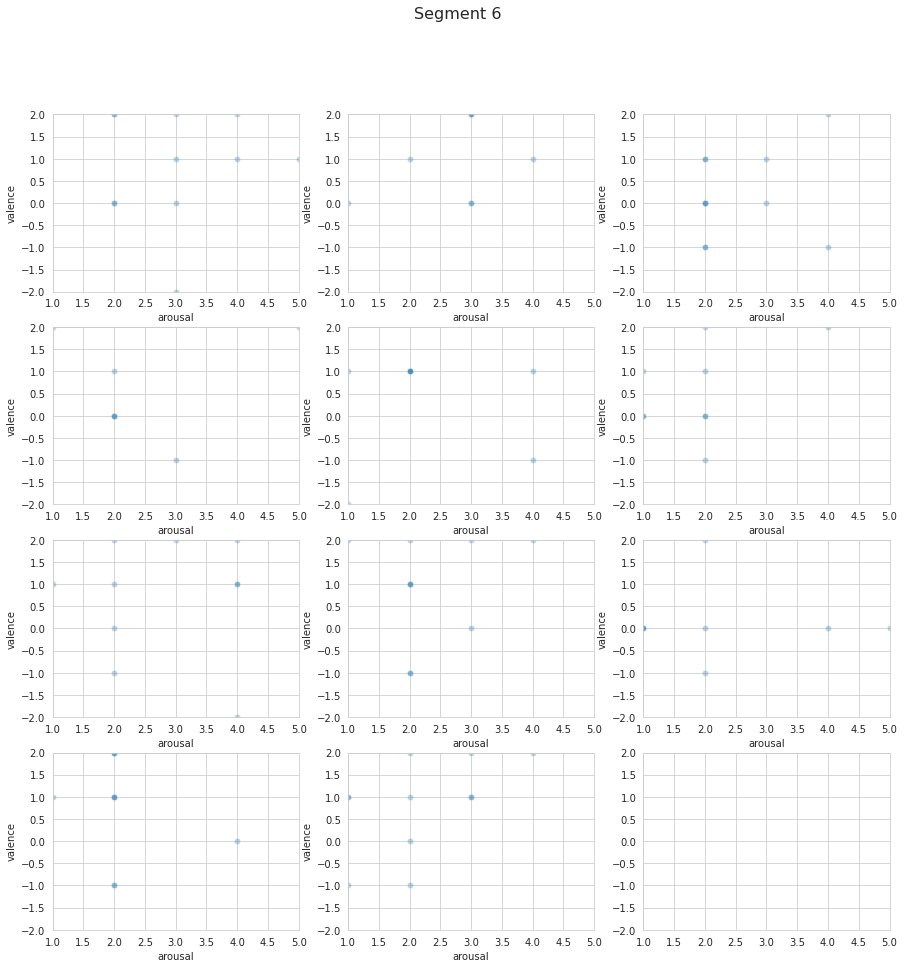

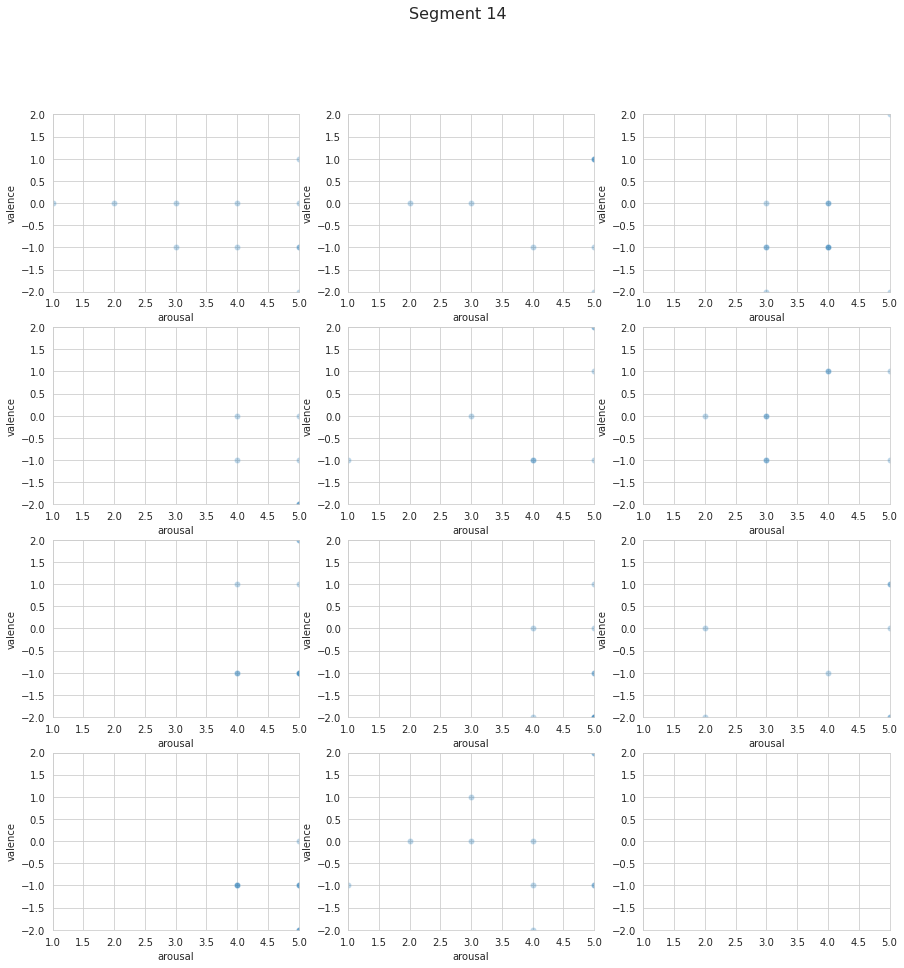

In [33]:
segments = np.random.randint(0, 27, 4)

for segment_id in segments:
    figure, axis = plt.subplots(4,3, figsize=(15,15))
    figure.suptitle(f'Segment {segment_id}', fontsize=16)

    pianist_1 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "1")][["annotator_id", 'valence', "arousal"]]
    pianist_2 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "2")][["annotator_id", 'valence', "arousal"]]
    pianist_3 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "3")][["annotator_id", 'valence', "arousal"]]
    pianist_4 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "4")][["annotator_id", 'valence', "arousal"]]
    pianist_5 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "5")][["annotator_id", 'valence', "arousal"]]
    pianist_6 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "6")][["annotator_id", 'valence', "arousal"]]
    pianist_7 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "7")][["annotator_id", 'valence', "arousal"]]
    pianist_8 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "8")][["annotator_id", 'valence', "arousal"]]
    pianist_9 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "9")][["annotator_id", 'valence', "arousal"]]
    pianist_10 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "10")][["annotator_id", 'valence', "arousal"]]
    pianist_11 = annotations[(annotations["segment_id"] == f'{segment_id}') & (annotations["pianist_id"] == "11")][["annotator_id", 'valence', "arousal"]]


    sns.scatterplot(data=pianist_1, x="arousal", y="valence", ax=axis[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_2, x="arousal", y="valence", ax=axis[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_3, x="arousal", y="valence", ax=axis[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_4, x="arousal", y="valence", ax=axis[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_5, x="arousal", y="valence", ax=axis[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_6, x="arousal", y="valence", ax=axis[1,2], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_7, x="arousal", y="valence", ax=axis[2,0], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_8, x="arousal", y="valence", ax=axis[2,1], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_9, x="arousal", y="valence", ax=axis[2,2], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_10, x="arousal", y="valence", ax=axis[3,0], legend=False, alpha=0.3)
    sns.scatterplot(data=pianist_11, x="arousal", y="valence", ax=axis[3,1], legend=False, alpha=0.3)

    axis[0,0].set_xlim(1,5)
    axis[0,0].set_ylim(-2,2)
    axis[0,1].set_xlim(1,5)
    axis[0,1].set_ylim(-2,2)
    axis[0,2].set_xlim(1,5)
    axis[0,2].set_ylim(-2,2)
    axis[1,0].set_xlim(1,5)
    axis[1,0].set_ylim(-2,2)
    axis[1,1].set_xlim(1,5)
    axis[1,1].set_ylim(-2,2)
    axis[1,2].set_xlim(1,5)
    axis[1,2].set_ylim(-2,2)
    axis[2,0].set_xlim(1,5)
    axis[2,0].set_ylim(-2,2)
    axis[2,1].set_xlim(1,5)
    axis[2,1].set_ylim(-2,2)
    axis[2,2].set_xlim(1,5)
    axis[2,2].set_ylim(-2,2)
    axis[3,0].set_xlim(1,5)
    axis[3,0].set_ylim(-2,2)
    axis[3,1].set_xlim(1,5)
    axis[3,1].set_ylim(-2,2)
    axis[3,2].set_xlim(1,5)
    axis[3,2].set_ylim(-2,2)

plt.show()

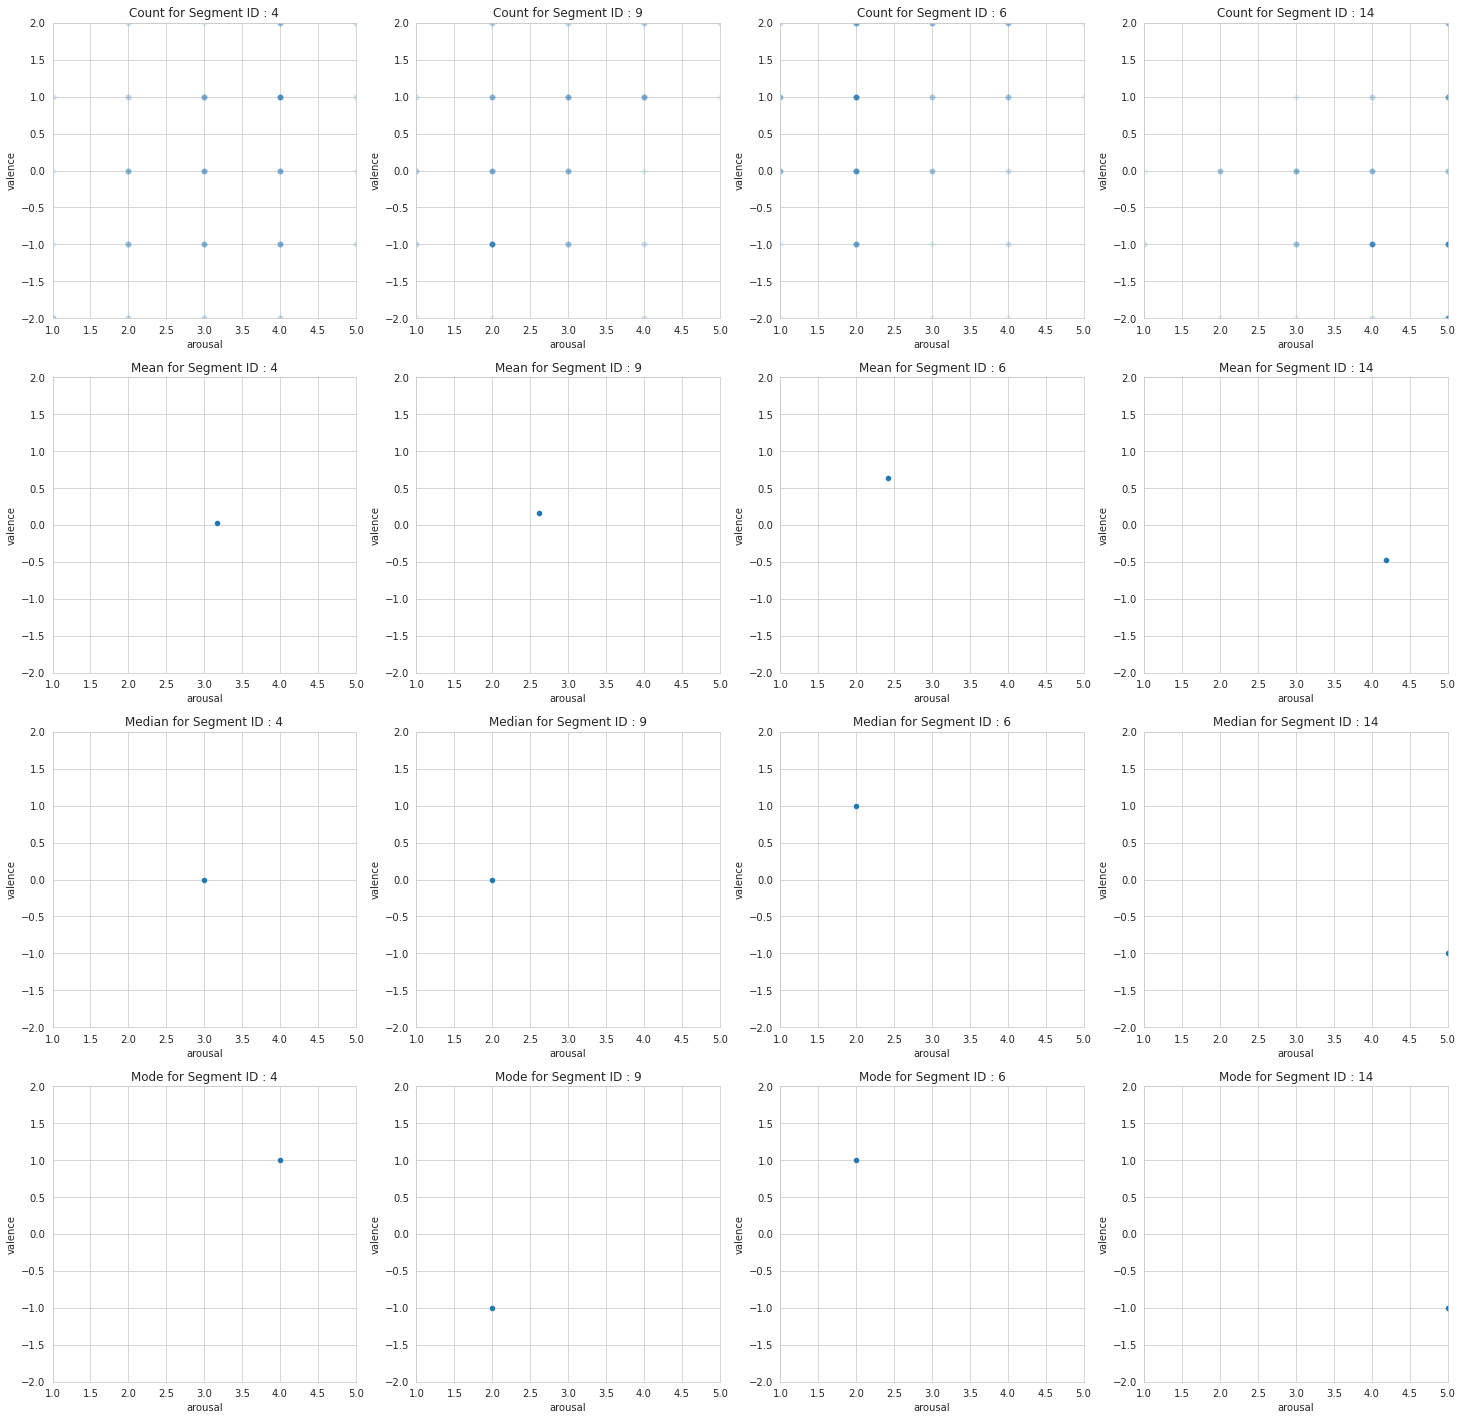

In [34]:
figure, axis = plt.subplots(4, 4, figsize=(25, 25))

for index, segment_id in enumerate(segments):
    axis[0, index].set_title(f"Count for Segment ID : {segment_id}")
    axis[0, index].set_xlim(1,5)
    axis[0, index].set_ylim(-2, 2)

    axis[1, index].set_title(f"Mean for Segment ID : {segment_id}")
    axis[1, index].set_xlim(1,5)
    axis[1, index].set_ylim(-2, 2)

    axis[2, index].set_title(f"Median for Segment ID : {segment_id}")
    axis[2, index].set_xlim(1,5)
    axis[2, index].set_ylim(-2, 2)

    axis[3, index].set_title(f"Mode for Segment ID : {segment_id}")
    axis[3, index].set_xlim(1,5)
    axis[3, index].set_ylim(-2, 2)

    segment = annotations[(annotations["segment_id"] == f'{segment_id}')][["annotator_id", 'valence', "arousal"]]
    means = segment.drop(columns="annotator_id").mean().to_frame().transpose()
    medians = segment.drop(columns="annotator_id").median().to_frame().transpose()
    modes = segment.drop(columns="annotator_id").agg(lambda x: pd.Series.mode(x).mean()).to_frame().transpose()

    sns.scatterplot(data=segment, x="arousal", y="valence", legend=False, alpha=0.1, ax=axis[0, index])
    sns.scatterplot(data=means, x="arousal", y="valence", legend=False, ax=axis[1, index])
    sns.scatterplot(data=medians, x="arousal", y="valence", legend=False, ax=axis[2, index])
    sns.scatterplot(data=modes, x="arousal", y="valence", legend=False, ax=axis[3, index])

plt.show()

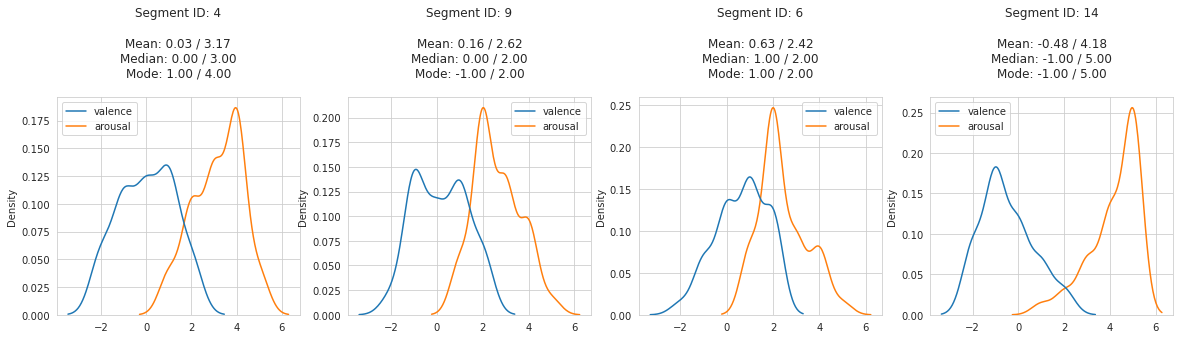

In [35]:
figure, axis = plt.subplots(1, 4, figsize=(20, 4))

for index, segment_id in enumerate(segments):
    segment = annotations[(annotations["segment_id"] == f'{segment_id}')][["annotator_id", 'valence', "arousal"]]
    sns.kdeplot(data=segment, ax=axis[index])


    means = segment.drop(columns="annotator_id").mean()
    medians = segment.drop(columns="annotator_id").median()
    modes = segment.drop(columns="annotator_id").agg(lambda x: pd.Series.mode(x).mean())


    axis[index].set_title(f"Segment ID: {segment_id}\n\n"
                          f"Mean: {means.valence:.2f} / {means.arousal:.2f}\n"
                          f"Median: {medians.valence:.2f} / {medians.arousal:.2f}\n"
                          f"Mode: {modes.valence:.2f} / {modes.arousal:.2f}\n"
                          )


# 2. Derive discrete quadrant-based class labels from the raw arousal/valence annotations. Any ideas on how to aggregate conflicting annotations? Outliers?

In [ ]:
def derive_class_label_mean(row):
   if row['valence'] <= 0 and row['arousal'] > 3:
      return 'Angry'

   if row['valence'] > 0 and row['arousal'] >= 3:
      return 'Happy'

   if row['valence'] < 0 and row['arousal'] <= 3:
      return 'Sad'

   if row['valence'] >= 0 and row['arousal'] < 3:
      return 'Relaxed'

mean_aggregated_segments = annotations.drop(columns=["annotator_id"]).groupby(["segment_id", "pianist_id"]).mean()
mean_aggregated_segments['class'] = mean_aggregated_segments.apply (lambda row: derive_class_label_mean(row), axis=1)
mean_aggregated_segments[["arousal", "valence", "class"]]

In [ ]:
def derive_class_label_median_and_mode(row):
   if row['valence'] <= 0 and row['arousal'] >= 3:
      return 'Angry'

   if row['valence'] > 0 and row['arousal'] > 3:
      return 'Happy'

   if row['valence'] < 0 and row['arousal'] < 3:
      return 'Sad'

   if row['valence'] >= 0 and row['arousal'] <= 3:
      return 'Relaxed'

median_aggregated_segments = annotations.drop(columns=["annotator_id"]).groupby(["segment_id", "pianist_id"]).median()
mode_aggregated_segments = annotations.drop(columns=["annotator_id"]).groupby(["segment_id", "pianist_id"]).agg(lambda x: pd.Series.mode(x).mean())

median_aggregated_segments['class'] = median_aggregated_segments.apply (lambda row: derive_class_label_median_and_mode(row), axis=1)
mode_aggregated_segments['class'] = mode_aggregated_segments.apply (lambda row: derive_class_label_median_and_mode(row), axis=1)

print("Median:")
display(median_aggregated_segments[["arousal", "valence", "class"]])

print("\nMode:")
display(mode_aggregated_segments[["arousal", "valence", "class"]])

# 3. How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much? How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?

In [ ]:
mean_class_distributions = mean_aggregated_segments.groupby("class").size().to_frame()
print(f"Mean Class Distributions Std: {mean_class_distributions.std()}")
display(mean_class_distributions)

median_class_distributions = median_aggregated_segments.groupby("class").size().to_frame()
print(f"Median Class Distributions Std: {median_class_distributions.std()}")
display(median_class_distributions)

mode_class_distributions = mode_aggregated_segments.groupby("class").size().to_frame()
print(f"Mode Class Distributions Std: {mode_class_distributions.std()}")
display(mode_class_distributions)

print("Mean Agregated Segments")

display(mean_aggregated_segments)
sns.histplot(data=mean_aggregated_segments['class'])
plt.show()

In [ ]:
CLASSES = ["Sad", "Happy", "Relaxed", "Angry"]
COLORS = dict(Sad="#1500ff", Happy="#00c535", Relaxed="#ffcb00", Angry="#ff0010")

figure, axis = plt.subplots(1, 3, figsize=(25, 5))

sns.scatterplot(data=mean_aggregated_segments, x="arousal", y="valence", hue="class", ax=axis[0], palette=COLORS)
sns.scatterplot(data=median_aggregated_segments, x="arousal", y="valence", hue="class", ax=axis[1], palette=COLORS)
sns.scatterplot(data=mode_aggregated_segments, x="arousal", y="valence", hue="class", ax=axis[2], palette=COLORS)


axis[0].set_title("Mean")
axis[1].set_title("Median")
axis[2].set_title("Mode")

for ax in axis:
    ax.set_xlim(1,5)
    ax.set_ylim(-2, 2)

plt.show()

ax = sns.scatterplot(data=mean_aggregated_segments, x="arousal", y="valence", hue="class", palette=COLORS)
ax.set_xlim(1,5)
ax.set_ylim(-2,2)
plt.show()

In [ ]:
print("Angry thoughts")
sns.pairplot(mode_aggregated_segments[['gemmes_interior', 'gems_peacefulness', 'gemmes_wandering', 'gems_tenderness',  'gems_wonder', 'gemmes_flow', 'class']], hue="class", palette=COLORS)
plt.show()

print("Happy thoughts")
sns.pairplot(mode_aggregated_segments[['gems_transcendence', 'gems_wonder', 'gemmes_flow', 'gemmes_interior', 'gems_sadness', 'gems_peacefulness', 'gemmes_wandering', 'gems_tenderness', 'class']], hue="class", palette=COLORS)
plt.show()

print("Relaxed thoughts")
sns.pairplot(mode_aggregated_segments[['gems_wonder','gemmes_flow', 'class']], hue="class", palette=COLORS)
plt.show()

print("Sad thoughts")
sns.pairplot(mode_aggregated_segments[[ 'gems_joyful_activation', 'gemmes_movement', 'gems_transcendence', 'gems_wonder', 'class']], hue="class", palette=COLORS)
plt.show()


aggregated_annotations = mean_aggregated_segments

In [ ]:
aggregated_features = features.drop(columns=['snippet_id']).groupby(["segment_id", "pianist_id"]).mean()

# copy the data
aggregated_features_scaled = aggregated_features.copy()

# apply normalization techniques
for column in aggregated_features_scaled.columns:
    aggregated_features_scaled[column] = (aggregated_features_scaled[column] -
                           aggregated_features_scaled[column].mean()) / aggregated_features_scaled[column].std()

# view normalized data
aggregated_features_scaled = aggregated_annotations['class'].to_frame().merge(aggregated_features_scaled, left_index=True, right_index=True)
aggregated_features_scaled

In [ ]:
from sklearn import tree
from sklearn.tree import export_text
import graphviz

print("Decision Tree Low Level Features")

feature_columns = aggregated_features_scaled.columns.to_list()
feature_columns.remove("class")

x = aggregated_features_scaled.loc[:, feature_columns].values
y = aggregated_features_scaled.loc[:,['class']].values

clf = tree.DecisionTreeClassifier()

clf.fit(x,y)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature_columns,
                     class_names=CLASSES,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision-tree-low-level-only')
display(graph)

r = export_text(clf, feature_names=feature_columns)
print(r)

In [ ]:
print("Decision Tree High Level Features")

feature_columns = aggregated_annotations.drop(columns=["arousal", "valence"]).columns.to_list()
feature_columns.remove("class")

x = aggregated_annotations.loc[:, feature_columns].values
y = aggregated_annotations.loc[:,['class']].values

clf = tree.DecisionTreeClassifier()

clf.fit(x,y)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature_columns,
                     class_names=CLASSES,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision-tree-high-level-only')

display(graph)

r = export_text(clf, feature_names=feature_columns)
print(r)

In [ ]:
aggregated_features_scaled_and_annotations = aggregated_annotations.drop(columns=["valence", "arousal", "class"]).merge(aggregated_features_scaled, left_index=True, right_index=True)


print("Decision Tree High & Low Level Features")

feature_columns = aggregated_features_scaled_and_annotations.columns.to_list()
feature_columns.remove("class")

x = aggregated_features_scaled_and_annotations.loc[:, feature_columns].values
y = aggregated_features_scaled_and_annotations.loc[:,['class']].values

clf = tree.DecisionTreeClassifier()

clf.fit(x,y)

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=feature_columns,
                     class_names=CLASSES,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision-tree-high-and-low-level')

display(graph)

r = export_text(clf, feature_names=feature_columns)
print(r)


In [ ]:
figure, axis = plt.subplots(6,3, figsize=(30,25))

axis[0,0].set_title("Essentia")
sns.kdeplot(data=aggregated_features_scaled[['essentia_dissonance_mean', 'essentia_dynamic_complexity', 'essentia_loudness', 'essentia_onset_rate', 'essentia_pitch_salience_mean', 'essentia_spectral_centroid_mean', 'essentia_spectral_complexity_mean', 'essentia_spectral_rolloff_mean', 'essentia_strong_peak_mean', 'class']], ax=axis[0,0])


axis[1,0].set_title("Librosa BPM")
sns.stripplot(data=aggregated_features_scaled[['librosa_bpm', 'class']], x="class", y="librosa_bpm", ax=axis[1,0])

axis[1,1].set_title("Librosa Chroma")
sns.kdeplot(data=aggregated_features_scaled[['librosa_chroma_std_0', 'librosa_chroma_std_1', 'librosa_chroma_std_2', 'librosa_chroma_std_3', 'librosa_chroma_std_4', 'librosa_chroma_std_5', 'librosa_chroma_std_6', 'librosa_chroma_std_7', 'librosa_chroma_std_8', 'librosa_chroma_std_9', 'librosa_chroma_std_10', 'librosa_chroma_std_11', 'class']], ax=axis[1,1])

axis[1,2].set_title("Librosa MFCC")
sns.kdeplot(data=aggregated_features_scaled[['librosa_mfcc_mean_0', 'librosa_mfcc_mean_1', 'librosa_mfcc_mean_2', 'librosa_mfcc_mean_3', 'librosa_mfcc_mean_4', 'librosa_mfcc_mean_5', 'librosa_mfcc_mean_6', 'librosa_mfcc_mean_7', 'librosa_mfcc_mean_8', 'librosa_mfcc_mean_9', 'librosa_mfcc_mean_10', 'librosa_mfcc_mean_11', 'class']], ax=axis[1,2])

axis[2,0].set_title("MIRToolbox")
sns.kdeplot(data=aggregated_features_scaled[['mirtoolbox_brightness', 'mirtoolbox_crescendo', 'mirtoolbox_dynamics_mean', 'mirtoolbox_hcdf_mean', 'mirtoolbox_irregularity', 'mirtoolbox_keyclarity', 'mirtoolbox_mode', 'mirtoolbox_novelty_mean', 'mirtoolbox_pulseclarity', 'mirtoolbox_roughness_mean', 'class']], ax=axis[2,0])

axis[3,0].set_title("Mid-Level Perceptual Features")
sns.kdeplot(data=aggregated_features_scaled[["midlevel_features_melody", "midlevel_features_articulation","midlevel_features_rhythm_complexity","midlevel_features_rhythm_stability","midlevel_features_dissonance","midlevel_features_tonal_stability","midlevel_features_minorness", 'class']], ax=axis[3,0])

axis[4,0].set_title("GEMS9 Features")
sns.kdeplot(data=aggregated_annotations[["gems_wonder", "gems_transcendence", "gems_tenderness", "gems_nostalgia", "gems_peacefulness", "gems_power", "gems_joyful_activation", "gems_tension", "gems_sadness", 'class']], ax=axis[4,0])

axis[4,1].set_title("GEMMES Features")
sns.kdeplot(data=aggregated_annotations[["gemmes_flow", "gemmes_movement", "gemmes_force", "gemmes_interior", "gemmes_wandering", 'class']], ax=axis[4,1])


axis[5,0].set_title("Decision Tree Features Mean")
sns.kdeplot(data=aggregated_features_scaled[['midlevel_features_melody', 'librosa_chroma_std_2', 'mirtoolbox_roughness_pct_90', 'librosa_chroma_pct_50_9', 'librosa_chroma_mean_4', 'mirtoolbox_roughness_std', 'class']], ax=axis[5,0])

axis[5,1].set_title("Decision Tree Features Mode")
sns.kdeplot(
    data=aggregated_features_scaled[['essentia_strong_peak_mean', 'librosa_chroma_pct_90_0', 'mirtoolbox_roughness_pct_10', 'librosa_chroma_pct_50_8', 'mirtoolbox_novelty_pct_90', 'class']],
    ax=axis[5,1])

plt.show()

In [ ]:
print("Decision Tree Features High and Low")
sns.pairplot(aggregated_features_scaled_and_annotations[['gems_tension', 'gems_power', 'gemmes_movement', 'gems_sadness', 'gems_peacefulness', 'gems_joyful_activation', 'librosa_chroma_pct_50_2', 'librosa_chroma_std_6', 'librosa_chroma_pct_10_5', 'mirtoolbox_irregularity', 'librosa_chroma_pct_50_0', 'class']], hue="class", palette=COLORS)
plt.show()

In [ ]:
sns.scatterplot(data=aggregated_features_scaled_and_annotations, y="mirtoolbox_irregularity", x="gems_peacefulness", hue="class", palette=COLORS)
plt.show()

# 4. How are GEMS9 and GEMMES related to arousal and valence?

In [ ]:
figure, axis = plt.subplots(3,6, figsize=(30,10))
figure.suptitle('GEMS9', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, ax=axis[1,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_power", hue="class", palette=COLORS, ax=axis[1,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,5], legend=False)

plt.show()

figure, axis = plt.subplots(2,5, figsize=(30,10))
figure.suptitle('GEMMES', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[1,0], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[0,1], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_force", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_force", hue="class", palette=COLORS, ax=axis[1,2], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[0,3], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[1,4], legend=False)



plt.show()

ax = sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, legend=True)
ax.set_title("CORR: 0.790932")

plt.show()
ax = sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, legend=False)
ax.set_title("CORR: 0.014368")

relation = aggregated_annotations.corr(method='pearson')
print(relation[(relation.index == 'arousal') | (relation.index == 'valence')])

plt.show()

sns.scatterplot(data=aggregated_annotations, x="gems_power", y="valence", hue="class", palette=COLORS, legend=False)
plt.show()

# 4. How are GEMS9 and GEMMES related to arousal and valence?

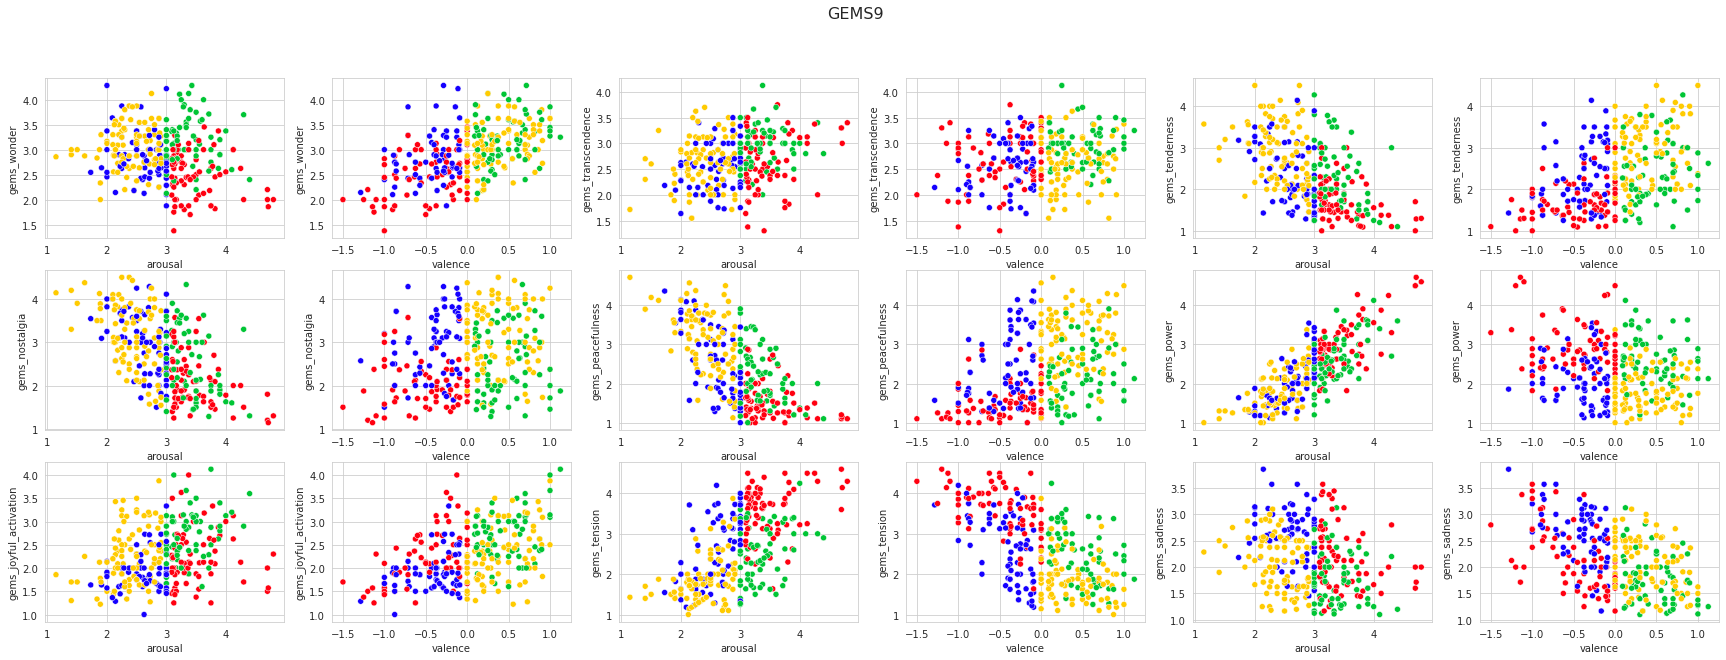

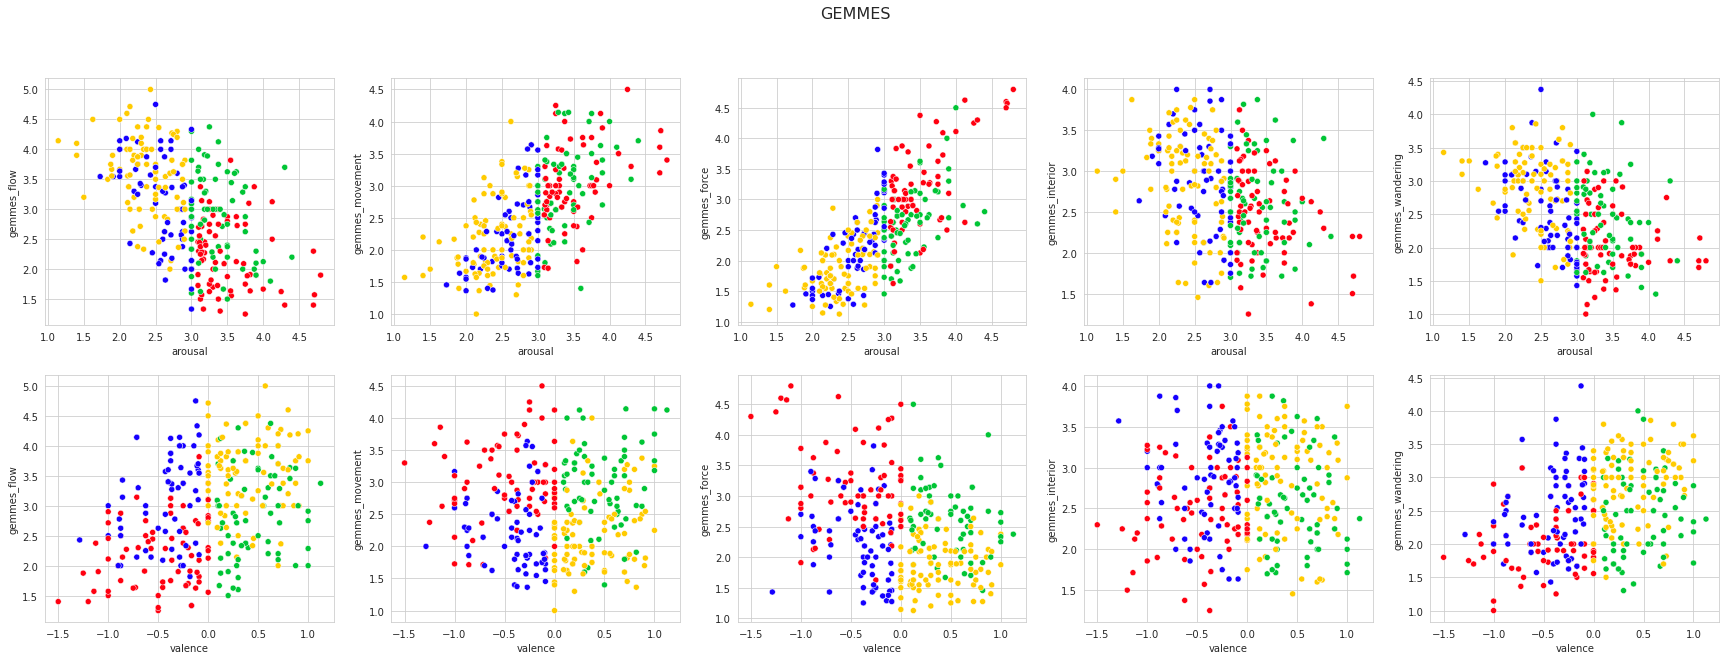

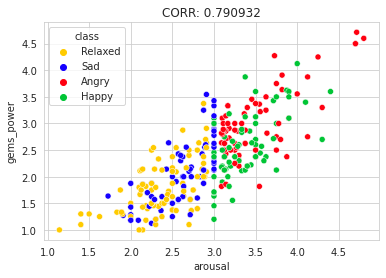

          arousal   valence  gems_wonder  gems_transcendence  gems_tenderness  \
arousal  1.000000 -0.165434    -0.193978            0.257724        -0.548398   
valence -0.165434  1.000000     0.533038            0.226668         0.454963   

         gems_nostalgia  gems_peacefulness  gems_power  \
arousal       -0.607214          -0.687724    0.790932   
valence        0.218542           0.404744   -0.242311   

         gems_joyful_activation  gems_tension  gems_sadness  gemmes_flow  \
arousal                0.300527      0.600287     -0.279107    -0.573141   
valence                0.476627     -0.618155     -0.528458     0.385485   

         gemmes_movement  gemmes_force  gemmes_interior  gemmes_wandering  
arousal         0.640167      0.766182        -0.345023         -0.481370  
valence         0.014368     -0.352230         0.015004          0.358821  


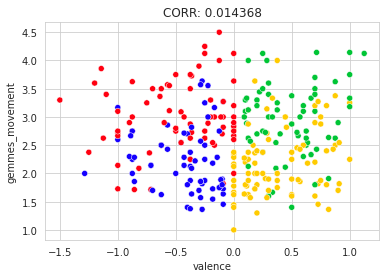

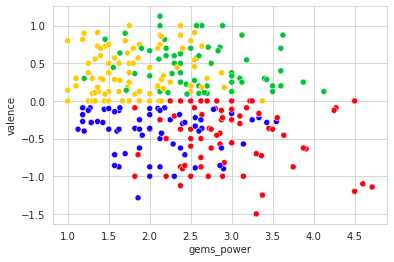

In [48]:
figure, axis = plt.subplots(3,6, figsize=(30,10))
figure.suptitle('GEMS9', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, ax=axis[1,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_power", hue="class", palette=COLORS, ax=axis[1,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,5], legend=False)

plt.show()

figure, axis = plt.subplots(2,5, figsize=(30,10))
figure.suptitle('GEMMES', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[1,0], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[0,1], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_force", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_force", hue="class", palette=COLORS, ax=axis[1,2], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[0,3], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[1,4], legend=False)



plt.show()

ax = sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, legend=True)
ax.set_title("CORR: 0.790932")

plt.show()
ax = sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, legend=False)
ax.set_title("CORR: 0.014368")

relation = aggregated_annotations.corr(method='pearson')
print(relation[(relation.index == 'arousal') | (relation.index == 'valence')])

plt.show()

sns.scatterplot(data=aggregated_annotations, x="gems_power", y="valence", hue="class", palette=COLORS, legend=False)
plt.show()

# 4. How are GEMS9 and GEMMES related to arousal and valence?

In [48]:
figure, axis = plt.subplots(3,6, figsize=(30,10))
figure.suptitle('GEMS9', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_wonder", hue="class", palette=COLORS, ax=axis[0,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_transcendence", hue="class", palette=COLORS, ax=axis[0,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tenderness", hue="class", palette=COLORS, ax=axis[0,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_nostalgia", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_peacefulness", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, ax=axis[1,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_power", hue="class", palette=COLORS, ax=axis[1,5], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_joyful_activation", hue="class", palette=COLORS, ax=axis[2,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_tension", hue="class", palette=COLORS, ax=axis[2,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gems_sadness", hue="class", palette=COLORS, ax=axis[2,5], legend=False)

plt.show()

figure, axis = plt.subplots(2,5, figsize=(30,10))
figure.suptitle('GEMMES', fontsize=16)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[0,0], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_flow", hue="class", palette=COLORS, ax=axis[1,0], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[0,1], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, ax=axis[1,1], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_force", hue="class", palette=COLORS, ax=axis[0,2], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_force", hue="class", palette=COLORS, ax=axis[1,2], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[0,3], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_interior", hue="class", palette=COLORS, ax=axis[1,3], legend=False)

sns.scatterplot(data=aggregated_annotations, x="arousal", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[0,4], legend=False)
sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_wandering", hue="class", palette=COLORS, ax=axis[1,4], legend=False)



plt.show()

ax = sns.scatterplot(data=aggregated_annotations, x="arousal", y="gems_power", hue="class", palette=COLORS, legend=True)
ax.set_title("CORR: 0.790932")

plt.show()
ax = sns.scatterplot(data=aggregated_annotations, x="valence", y="gemmes_movement", hue="class", palette=COLORS, legend=False)
ax.set_title("CORR: 0.014368")

relation = aggregated_annotations.corr(method='pearson')
print(relation[(relation.index == 'arousal') | (relation.index == 'valence')])

plt.show()

sns.scatterplot(data=aggregated_annotations, x="gems_power", y="valence", hue="class", palette=COLORS, legend=False)
plt.show()

# 5. Which features seem useful for classification? Which ones are correlated with the labels?

# 6. Any interesting conclusions you can draw from this for the next project phase?